
___
# From zero to Hero Probablity of Default model with Python

For this lecture we will be working with the credit risk dataset. This is prepared for the student's as a first step in credit risk ! 

We'll be trying to predict a classification- default or not default.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the credit risk data set

## Import Libraries
Let's import some libraries to get started!

In [ ]:
import _____ as pd
import _____ as np
import _____ as plt
import _____ as sns
%matplotlib inline

## Load the Data

Let's start by reading in the pd_dummy_dataset.csv file into a pandas dataframe.

In [ ]:
df = pd._______('pd_dataset.csv')

## Exercise 1 
Using the table PD_dataset, create the following samples to be used for creating the model:

1. ) Development sample: (70% obsevations)
2. ) Test sample: (remaining 30% obsevations)



In [ ]:
#load the function 
from sklearn.model_selection import ___________

#divide the dataset into the development and test sample. 
X_train, X_test = _________(df, test_size=____, 
                                                    random_state=101)

In [ ]:
pd.set_option('display.max_columns', None)
X_train.reset_index(inplace=True)
X_train.head()

## Univariate analysis 

## Exercise 2 
Perform an univariate analysis of all the variables involved (except for: PD, Rating, Score, snapshot_year, cif_combo, spapshot_date, into_default) in the development sample table created before, in order to determinate if all of them are candidates or if any adjustment it is needed, by obtaining the following:

- Number of observations
- Mean, std,
- Maximum, Minimum 
- Percentiles 25, 50, 75
- Number of missing and zero values
- Histogram of the variable 

Hint : describe, info, isna, hist

In [ ]:
#describe the data
X_train.______(include='all')

In [ ]:
#get info of the data
X_train.____()

In [ ]:
#calculate the Number of missing
X_train.____().sum()

In [ ]:
for i in X_train.______:
    column = X_train[i]
    # Get the count of Zeros in column 
    count = (column == _).sum()
    print('Count of zeros in columbn ', i, ' is : ', count)

In [ ]:
#select only numeric columns and plot the histogram
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = X_train.select_dtypes(include=numerics)

newdf.___(bins=30, figsize=(15, 10))

In [ ]:
newdf=X_train.select_dtypes(exclude=['object'])
for column in newdf:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=newdf, x=column)

In [ ]:
sns.catplot(data=df, x="_________", y="PD", kind="box")
sns.catplot(data=df, x="_________", y="PD", kind="box")
sns.catplot(data=df, x="_________", y="PD", kind="box")
sns.catplot(data=df, x="_________", y="PD", kind="box")
sns.catplot(data=df, x="_________", y="PD", kind="box")

## Exercise 2 part 2 :
With the analysis obtained classify each variable into the following categories:

- Keep or delete

Hint : Which of the variable(s) should be kept or deleted - Business perspective and descriptive statistic

In [ ]:
X_train.head()

In [ ]:
X_train = X_train.drop(columns=[______])

In [ ]:
X_train.head()

# Exercise 3 - Part 1 

Using the development sample table perform the bivariate analysis of all the variables that pass the previous univariate analysis, obtaining the following:
- ROC value
- P value
- Beta 
- Standard error

Hint : OLS, roc_auc_score


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import _______

newdf=X_train.select_dtypes(exclude=['object'])
df2 = pd.DataFrame()
for i in range(2,len(newdf.columns)):
    #define target variable
    y = newdf['______']
    
    #define explanatory variable
    x = newdf.iloc[:,i]
    
    #fit linear regression model
    model = sm.OLS(_, _).fit()
    
    #name
    df2.loc[i,'name'] =model.summary2().tables[1].index[0]
    
    #coef
    df2.loc[i,'_____'] = round(model.summary2().tables[1].iloc[0,0],6)
    
    #std err
    df2.loc[i,'_____'] = round(model.summary2().tables[1].iloc[0,1],6)
    
    #p value
    df2.loc[i,'_____'] = round(model.summary2().tables[1].iloc[0,3],2)
    
    #auc value
    df2.loc[i,'auc'] = round(_______(y, model.predict(newdf.iloc[:,i])),2)
df2

# Exercise 3 - Part 2

- __Graphic each one of the explanatory variables with the default:__
    * For the continuous variables, plot the information by deciles. (Hint : qcut, pointplot, groupby)
    * For discrete or categorical variables plot the entire information. (Hint : pointplot, groupby)
- __With the previous graphics, categorize the variables in order to create buckets with significant difference level of default with an adequate tendency.__ Hint: replace
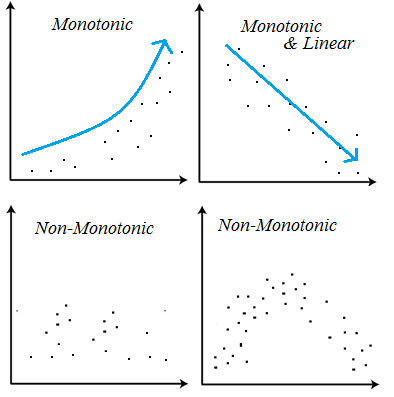
- __Create the WOE of the variable and their corresponding graphics.__
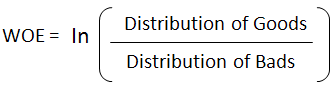

Hint : crosstab, 
```python
for i in range(len(X_train)):
    if X_train.loc[i,'loan_purpose'] == x['woe'].index[0]:
        X_train.loc[i,'loan_purpose_woe'] = x['woe'][0]
    elif X_train.loc[i,'loan_purpose'] == x['woe'].index[1]:
        X_train.loc[i,'loan_purpose_woe'] = x['woe'][1]
        
X_train['balance_sum_eur'] = np.where((X_train['balance_sum_eur'] < ______),'A',\
        np.where((X_train['balance_sum_eur'] > 60707) & (X_train['balance_sum_eur'] < ______), 'B', 'C'))
...
                                            
        ```

In [ ]:
#Graphic each one of the explanatory variables with the default - categorical variables
newdf=X_train.select_dtypes(include=['object'])
newdf['default'] = X_train.into_default
for i in list(newdf.iloc[:, 0:-1].columns):
    plt.figure()
    #mean of the target variable
    plot = newdf.______(i, as_index=False)['_____'].mean()
    sns.pointplot(x=i,y='______',data=plot,color='darkorange')
    #frequency of each unique values
    print(newdf.groupby(i, as_index=False)['______'].count().iloc[:,1]/len(newdf))
    plt.show()

In [ ]:
#With the previous graphics, categorize the variables in order to create buckets 
#with significant difference level of default with an adequate tendency
#example with replace :
X_train['Class_Chan_Ref_LoDoc'] = X_train.___________.replace('A' , 'AB')\
                                    .replace('B' , 'AB')\
                                    .replace('D' , 'DE')\
                                    .replace('E' , 'DE')
X_train['Class_DTI'] = 
X_train['Class_Initial_LTV'] = 

X_train['Class_Pay_Ahead'] = 
X_train['Class_Pay_Hist'] = 

X_train['Class_Pay_Status'] = 

X_train['Class_Redraw_Change'] = 
X_train['Class_Repay_Stat'] = 



In [ ]:
#Graphic each one of the explanatory variables with the default - continuous variables
newdf=X_train.______(exclude=['object'])
for i in list(newdf.loc[:, ['_______','______','_______']].columns):
    plt.figure()
    newdf[i] =pd.qcut(X_train[i], q=3)
    #mean of the target variable
    plot = newdf.groupby(i, as_index=False)['_______'].mean()
    sns.pointplot(x=i,y='_______',data=plot,color='darkorange')
    plt.xticks(rotation=90)
    #frequency of each unique values
    print(newdf.groupby(i, as_index=False)['_______'].count().iloc[:,1]/len(newdf))
    plt.show()

In [ ]:
#Create the WOE of the variable
x = pd.crosstab(X_train['Class_Chan_Ref_LoDoc'],X_train['into_default'], normalize='columns').assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))

for i in range(len(X_train)):
    if X_train.loc[i,'Class_Chan_Ref_LoDoc'] == x['woe'].index[0]:
        X_train.loc[i,'Class_Chan_Ref_LoDoc_woe'] = x['woe'][0]
    elif X_train.loc[i,'Class_Chan_Ref_LoDoc'] == x['woe'].index[1]:
        X_train.loc[i,'Class_Chan_Ref_LoDoc_woe'] = x['woe'][1]
    elif X_train.loc[i,'Class_Chan_Ref_LoDoc'] == x['woe'].index[2]:
        X_train.loc[i,'Class_Chan_Ref_LoDoc_woe'] = x['woe'][2]
        
X_train.head()

In [ ]:
#Create the WOE of the variable
#loan_purpose

In [ ]:
#Create the WOE of the variable
#class_DTI

In [ ]:
#Create the WOE of the variable
#Class_Initial_LTV


In [ ]:
#Create the WOE of the variable
#Class_Pay_Ahead

In [ ]:
#Create the WOE of the variable
#Class_Pay_Hist

In [ ]:
#Create the WOE of the variable
#Class_Pay_Status

In [ ]:
#Create the WOE of the variable
#Class_Redraw_Change

In [ ]:
#Create the WOE of the variable
#Class_Repay_Stat

In [ ]:
#Create the WOE of the variable
X_train['balance_sum_eur'] = np.where((X_train['balance_sum_eur'] < 60707),'A',\
        np.where((X_train['balance_sum_eur'] > 60707) & (X_train['balance_sum_eur'] < 108863), 'B', 'C'))


In [ ]:
#Create the WOE of the variable
x = pd.crosstab(X_train['balance_sum_eur'],X_train['into_default'], normalize='columns').assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))

for i in range(len(X_train)):
    if X_train.loc[i,'balance_sum_eur'] == x['woe'].index[0]:
        X_train.loc[i,'balance_sum_eur_woe'] = x['woe'][0]
    elif X_train.loc[i,'balance_sum_eur'] == x['woe'].index[1]:
        X_train.loc[i,'balance_sum_eur_woe'] = x['woe'][1]
    elif X_train.loc[i,'balance_sum_eur'] == x['woe'].index[2]:
        X_train.loc[i,'balance_sum_eur_woe'] = x['woe'][2]
        
X_train.head()


In [ ]:
#Create the WOE of the variable
#balance_sum_loc

In [ ]:
#balance_sum_loc


In [ ]:
newdf = X_train
newdf['default'] = X_train.into_default
newdf=newdf.iloc[:, -12:]
newdf.head()

In [ ]:
#and their corresponding graphics.
for i in list(newdf.iloc[:, 0:-1].columns):
    plt.figure()
    #mean of the target variable
    plot = newdf.groupby(i, as_index=False)['_____'].mean()
    sns.pointplot(x=i,y='_____',data=plot,color='darkorange')
    #frequency of each unique values
    print(newdf.groupby(i, as_index=False)['_____'].count().iloc[:,1]/len(newdf))
    plt.show()

# Exercise 4

Using the same table as in the previous exercises, perform the multivariate analysis of all the variables that pass the previous univariate and bivariate analysis, obtaining correlation matrix for all the variables.

Hint : heatmap

In [ ]:
X_train['default'] = X_train.into_default

plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns._______(X_train.iloc[:, -13:].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Exercise 5
Using the same table (model development) as in the previous exercises, generate different alternatives of models, including the following:
- ROC value
- P value
- Beta 
- Standard error
- AUC

Hint : OLS, roc_auc_score

In [ ]:
#let's start with bivariate analysis with each variable that grouped by acc thir WOE values
df2 = pd.DataFrame()
for i in range(1,len(newdf.columns)-1):
     #define target variable
    y = newdf['______']
    
    #define explanatory variable
    x = newdf.iloc[:,i]
    
    #fit linear regression model
    model = sm.OLS(_, _).fit()
    
    #name
    df2.loc[i,'name'] =model.summary2().tables[1].index[0]
    
    #coef
    df2.loc[i,'coeff'] = round(model.summary2().tables[1].iloc[0,0],6)
    
    #std err
    df2.loc[i,'std_err'] = round(model.summary2().tables[1].iloc[0,1],6)
    
    #p value
    df2.loc[i,'p_value'] = round(model.summary2().tables[1].iloc[0,3],2)
    
    #auc value
    df2.loc[i,'auc'] = round(________(y, model.predict(newdf.iloc[:,i])),2)
df2


In [ ]:
newdf = X_train
newdf['default'] = X_train.into_default
newdf=newdf.iloc[:, -12:]
newdf.head()

In [ ]:
#generate the logit model
import statsmodels.formula.api as smf
pd_model = log_reg = smf.logit("default ~ ________ + __________ + ...", data=newdf).fit()
print(pd_model.summary())

In [ ]:

X_train['______']= pd_model.predict(X_train)

In [ ]:
#get the classification report
from sklearn.metrics import classification_report
print(classification_report(y, pd_value>0.5))

In [ ]:
#plot the roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(________, ___________)
fpr, tpr, thresholds = roc_curve(________, __________)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Exercise 6
With the final model created in exercise 5, build a PD, do the PD calibration, considering the following:

- 7-9 risk buckets
- Concentration for each grade less than 30%
- Calculate the PD PiT (12 months)
- Calculate the central tendency 
- Finally, calculate the PD TTC adjusted via Bayes with the central tendency obtained before. 


In [ ]:
X_train.head()

In [ ]:
#let's create the buckets
X_train['bucket'] = pd.____(pd_value,_)
X_train.head()

In [ ]:
#Check if there is any concentration 
X_train['bucket'].value_counts() / len(X_train) < ____

In [ ]:
#bring date information from the main dataset to be able to calculate PiT PD
right_df = pd.DataFrame()
right_df['index'] = df.index
right_df['_________'] = df.snapshot_date
X_train = X_train.merge(right_df, on='index', how='left')


In [ ]:
#calculate the PiT PD

In [ ]:
#Calculate the Central Tendency

In [ ]:
#Calculate the LRA PD 

In [ ]:
sns.lineplot(data=df_PD.____, color="r")
ax2 = plt.twinx()
sns.lineplot(data=df_PD.____, color="b", ax=ax2)


## CongratulationGreat Job!
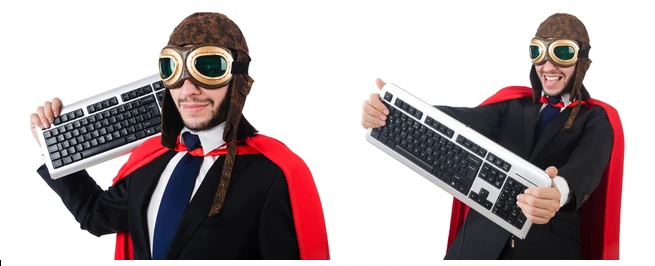